In [1]:
from fastbook import *

In [2]:
path = URLs.path('titanic')

In [3]:
Path.BASE_PATH = path

In [4]:
path.ls(file_type='text')

(#8) [Path('gender_submission.csv'),Path('submission_nn.csv'),Path('train.csv'),Path('test.csv'),Path('submission_nn_wd.csv'),Path('submission_rf.csv'),Path('submission.csv'),Path('submission_nn_moms.csv')]

In [5]:
# low_memory false to force panda to go through the whole data
df = pd.read_csv(path/'train.csv', low_memory=False)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.Survived.unique()

array([0, 1])

In [9]:
df.Pclass.unique()

array([3, 1, 2])

In [10]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,  4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [12]:
df.Age.dtype

dtype('float64')

In [13]:
dep_var = 'Survived'
df[dep_var].shape

(891,)

# Decision Trees

In [14]:
df_test = pd.read_csv(path/'test.csv', low_memory=False)

In [15]:
# df_test

In [16]:
from fastai.tabular.all import *

In [17]:
procs = [Categorify, FillMissing]
# procs = [FillMissing]

In [18]:
splits = RandomSplitter()(range_of(df))

In [19]:
type(splits)

tuple

In [20]:
# RandomSplitter

In [21]:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

In [22]:
cont

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [23]:
cat

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [24]:
cat.remove('Name')

In [25]:
cat

['Sex', 'Ticket', 'Cabin', 'Embarked']

In [26]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [27]:
to.show(3)

,Sex,Ticket,Cabin,Embarked,Age_na,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
788,male,C.A. 2315,#na#,S,False,789,3,1.0,1,2,20.575001,1
525,male,367232,#na#,Q,False,526,3,40.5,0,0,7.750000,0
821,male,315098,#na#,S,False,822,3,27.0,0,0,8.662500,1


In [28]:
to.items.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na
788,789,1,3,"Dean, Master. Bertram Vere",2,1.0,1,2,549,20.575001,0,3,1
525,526,0,3,"Farrell, Mr. James",2,40.5,0,0,447,7.750000,0,2,1
821,822,1,3,"Lulic, Mr. Nikola",2,27.0,0,0,270,8.662500,0,3,1


In [29]:
# to.classes['Name']

# Creating the Decision Tree

In [30]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
m = DecisionTreeRegressor(max_leaf_nodes=16)
m.fit(xs, y);

In [33]:
from dtreeviz.trees import *

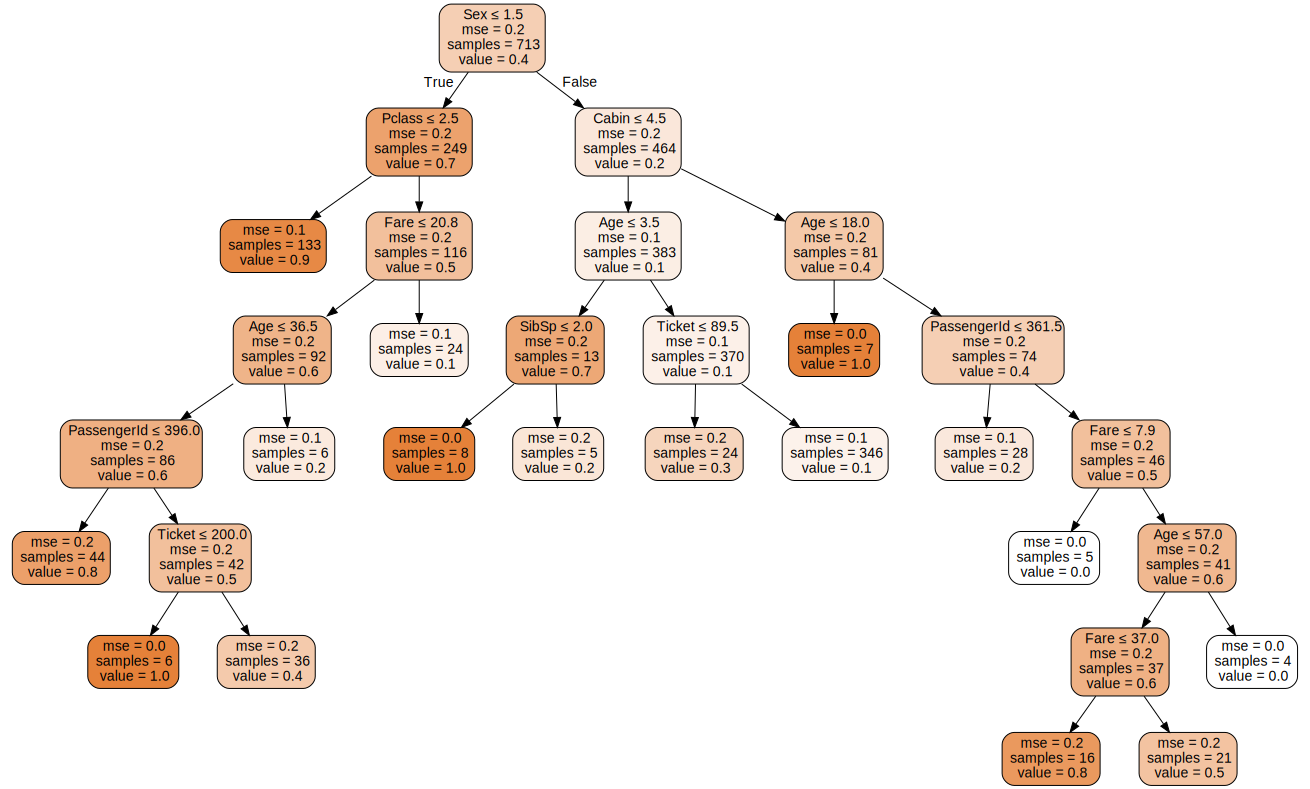

In [34]:
draw_tree(m, xs, size=100, precision=1)

In [35]:
# ratio of splitter
valid_xs.shape[0]/xs.shape[0]

0.2496493688639551

# Score

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y, np.round(m.predict(xs)))

0.8597475455820477

In [38]:
accuracy_score(valid_y, np.round(m.predict(valid_xs)))

0.7921348314606742

In [39]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Feature Importance

In [40]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [41]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
0,Sex,0.537176
6,Pclass,0.132597
7,Age,0.102067
10,Fare,0.073946
2,Cabin,0.064942
5,PassengerId,0.034747
1,Ticket,0.032740
8,SibSp,0.021783
3,Embarked,0.000000
4,Age_na,0.000000


# Removing Low-Importance Variables

In [42]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

8

In [43]:
to_keep

0             Sex
6          Pclass
7             Age
10           Fare
2           Cabin
5     PassengerId
1          Ticket
8           SibSp
Name: cols, dtype: object

In [44]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [45]:
m_imp = DecisionTreeRegressor(max_leaf_nodes=16)
m_imp.fit(xs_imp, y)

DecisionTreeRegressor(max_leaf_nodes=16)

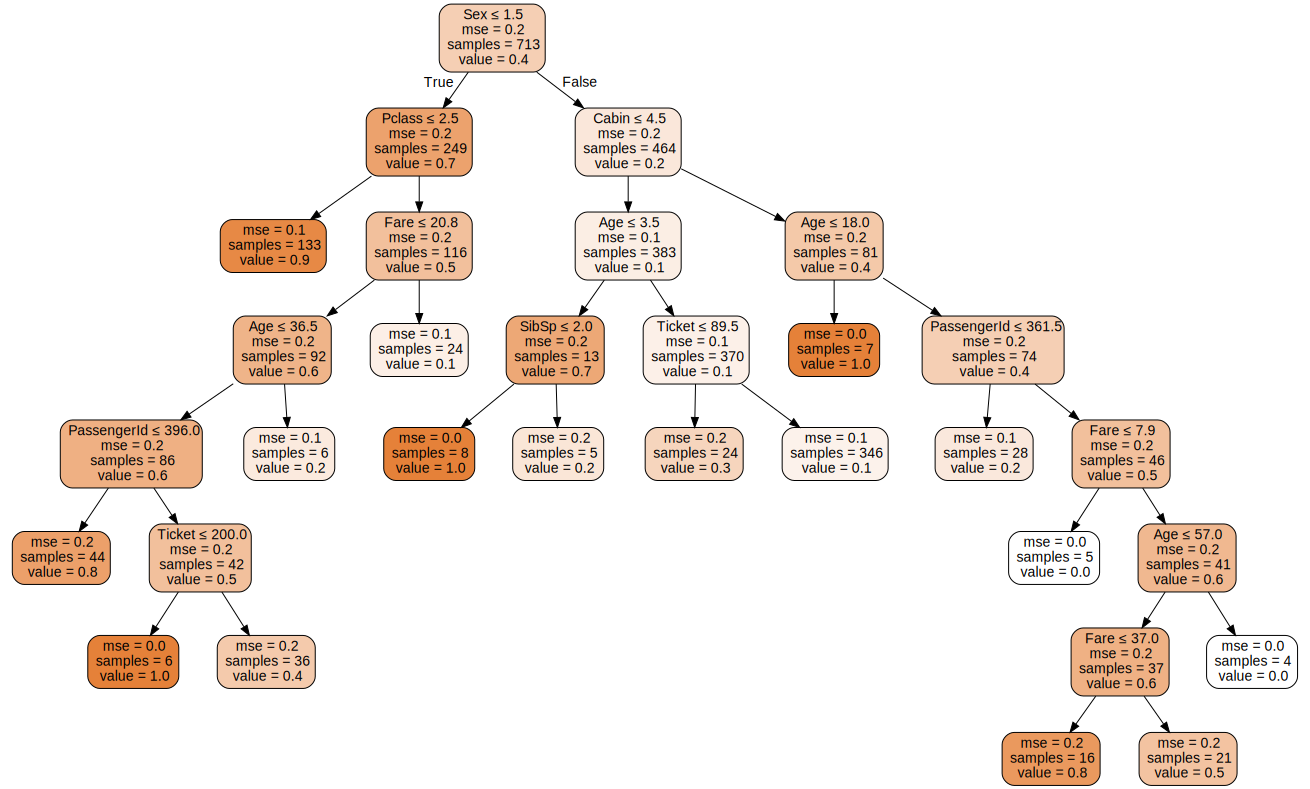

In [46]:
draw_tree(m_imp, xs_imp, size=100, precision=1)

In [47]:
xs_imp

,Sex,Pclass,Age,Fare,Cabin,PassengerId,Ticket,SibSp
788,2,3,1.0,20.575001,0,789,549,1
525,2,3,40.5,7.750000,0,526,447,0
821,2,3,27.0,8.662500,0,822,270,0
253,2,3,30.0,16.100000,0,254,537,1
374,1,3,3.0,21.075001,0,375,396,3
...,...,...,...,...,...,...,...,...
173,2,3,21.0,7.925000,0,174,660,0
462,2,1,47.0,38.500000,134,463,7,0
358,1,3,28.0,7.879200,0,359,280,0
532,2,3,17.0,7.229200,0,533,211,1


In [48]:
xs_test = TabularPandas(df_test, procs, cat, cont)[to_keep]

In [49]:
xs_test

,Sex,Pclass,Age,Fare,Cabin,PassengerId,Ticket,SibSp
0,2,3,34.5,7.829200,0,892,153,0
1,1,3,47.0,7.000000,0,893,222,1
2,2,2,62.0,9.687500,0,894,74,0
3,2,3,27.0,8.662500,0,895,148,0
4,1,3,22.0,12.287500,0,896,139,1
...,...,...,...,...,...,...,...,...
413,2,3,27.0,8.050000,0,1305,268,0
414,1,1,39.0,108.900002,23,1306,325,0
415,2,3,38.5,7.250000,0,1307,347,0
416,2,3,27.0,8.050000,0,1308,221,0


In [50]:
y_test = np.round(m_imp.predict(xs_test))
y_test

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
     

# Submission file

In [51]:
submit = pd.DataFrame({
    "PassengerId": df_test.PassengerId,
    "Survived": y_test.astype(int)
})

In [52]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [53]:
submit.to_csv(path/'submission.csv', index=False)

In [54]:
m.get_n_leaves()

16

# Creating a Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
# def rf(xs, y, n_estimators=40, max_samples=350,
#       max_features=0.5, min_samples_leaf=5, **kwargs):
#     return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
#         max_samples=max_samples, max_features=max_features,
#         min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [57]:
def rf(xs, y, n_estimators=160, max_samples=350,
      max_features=0.5, min_samples_leaf=4, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [58]:
m = rf(xs, y)

In [59]:
len(xs)

713

In [60]:
len(xs.columns)

11

In [61]:
m

RandomForestRegressor(max_features=0.5, max_samples=350, min_samples_leaf=4,
                      n_estimators=160, n_jobs=-1, oob_score=True)

In [62]:
preds = np.stack([t.predict(xs) for t in m.estimators_])

In [63]:
# np.round(preds.mean(0))

In [64]:
accuracy_score(y, np.round(preds.mean(0)))

0.884992987377279

In [65]:
preds_std = preds.std(0)

In [66]:
preds_std[:5]

array([0.34396339, 0.20396734, 0.23478367, 0.19746954, 0.3259007 ])

In [67]:
# preds.mean(0)

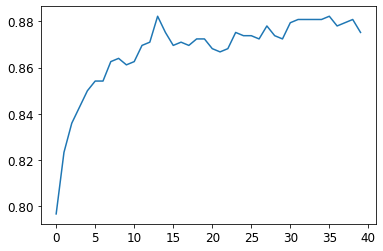

In [68]:
plt.plot([accuracy_score(y, np.round(preds[:i+1].mean(0))) for i in range(40)]);

In [69]:
accuracy_score(np.round(m.oob_prediction_), y)

0.82328190743338

# Feature Importance

In [70]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [71]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
0,Sex,0.350361
10,Fare,0.129325
1,Ticket,0.116384
7,Age,0.094027
6,Pclass,0.085120
5,PassengerId,0.083981
2,Cabin,0.077989
8,SibSp,0.023465
3,Embarked,0.020080
9,Parch,0.014196


# Removing Low-Importance Variables

In [72]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

11

In [73]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [74]:
m = rf(xs_imp, y)

In [75]:
accuracy_score(y, np.round(m.predict(xs_imp))),accuracy_score(valid_y, np.round(m.predict(valid_xs_imp)))

(0.8821879382889201, 0.8370786516853933)

In [76]:
len(xs.columns), len(xs_imp.columns)

(11, 11)

# Partial Dependence

In [77]:
# p = xs_imp['Sex'].value_counts(sort=False).plot.barh()
# c = to.classes['Sex']
# plt.yticks(range(len(c)), c);

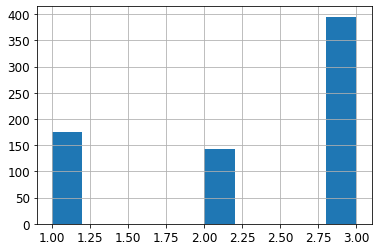

In [78]:
ax = xs_imp['Pclass'].hist()

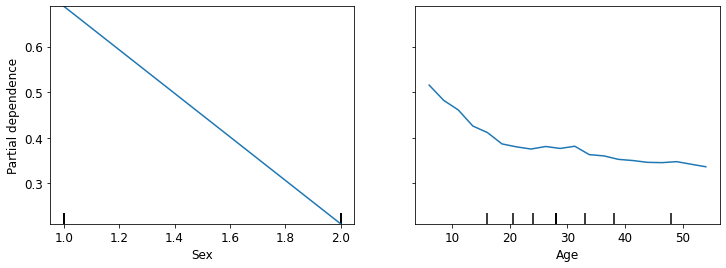

In [79]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, xs_imp, ['Sex','Age'],
                        grid_resolution=20, ax=ax);

# Tree Interpreter

In [80]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [81]:
row = xs_imp.iloc[:5]

In [82]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

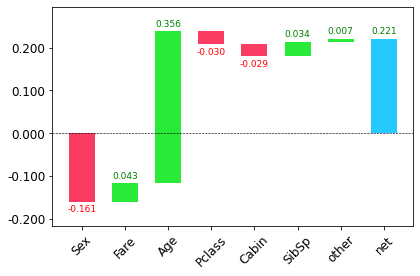

In [83]:
waterfall(xs_imp.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');

# Submission

In [84]:
xs_test = TabularPandas(df_test, procs, cat, cont)[to_keep]

In [85]:
y_test = np.round(m.predict(xs_test))
y_test ;

In [86]:
submit = pd.DataFrame({
    "PassengerId": df_test.PassengerId,
    "Survived": y_test.astype(int)
})
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
submit.to_csv(path/'submission_rf.csv', index=False)

# Save

In [88]:
# save_pickle(path/'xs_imp.pkl', xs_imp)
# save_pickle(path/'valid_xs_imp.pkl', valid_xs_imp)